In [1]:
import requests
import apimoex # pip install apimoex

import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import talib #pip install TA_Lib-0.4.24-cp310-cp310-win_amd64.whl
from mpl_finance import candlestick2_ohlc, volume_overlay2, plot_day_summary_oclh #pip install mpl_finance

%matplotlib inline

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


Сравнение объёмов по дням недели

In [2]:
def to_date(string):
    yyyy = int(string[0:4])
    mm = int(string[5:7])
    dd = int(string[8:10])
    return datetime.date(yyyy, mm, dd)

In [3]:
class viewer():
    def __init__(self) -> None:
        self.moment = datetime.datetime.now()
        self.instrument = 'SBER'
        self.timeframes = {
            1: 'minutes',
            10: 'ten minutes',
            60: 'hours'}
        self.candles = {
            'minutes': [],
            'ten minutes': [],
            'hours': []
        }

    def get_timeframes(self, steps=5000):        
        for timeframe in self.timeframes.keys():
            self.start_date = self.moment - datetime.timedelta(minutes=steps*timeframe)
            self.candles[self.timeframes[timeframe]] = apimoex.get_market_candles(
                requests.Session(), self.instrument, timeframe, start=str(self.start_date), end=str(self.moment))

    def reorganize_candles(self):
        self.sep_candles = {}
        for tf_key, tf_value in self.candles.items():
            self.sep_candles[tf_key] = {
                'begin': [],
                'open': [],
                'close': [],
                'high': [],
                'low': [],
                'value': []}
            for candle in tf_value:
                for key, value in candle.items():
                    self.sep_candles[tf_key][key].append(value)

    def init_plot(self, n_subplots):
        self.n_subplot = 0
        self.lim = 120
        self.low = 0
        self.up = self.low + self.lim

        self.fig, self.ax = plt.subplots(n_subplots, sharex=True, figsize=(20, 12))
        self.ax[0].xaxis.set_major_locator(ticker.MaxNLocator(30))
        self.ax[0].yaxis.set_major_locator(ticker.MaxNLocator(5))
        self.ax[1].yaxis.set_major_locator(ticker.MaxNLocator(5))


        xdate = self.sep_candles['minutes']['begin'][self.low:self.up]
        def chart_date(x, pos):
            try:
                return xdate[int(x)]
            except IndexError:
                return ''

        self.ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(chart_date))

        self.fig.autofmt_xdate(rotation=90)
        self.fig.tight_layout()

    
    def plot_candles(self):
        candlestick2_ohlc(self.ax[self.n_subplot], self.sep_candles['minutes']['open'][self.low:self.up],
        self.sep_candles['minutes']['high'][self.low:self.up], self.sep_candles['minutes']['low'][self.low:self.up],
        self.sep_candles['minutes']['close'][self.low:self.up], width=0.6, colorup='#77d879', colordown='#db3f3f')

        self.n_subplot += 1
        

    def plot_MACD(self):
        self.sep_candles['minutes']['close'] = np.asarray(self.sep_candles['minutes']['close'])
        self.macd, self.macdsignal, self.macdhist = talib.MACD(self.sep_candles['minutes']['close'], fastperiod=12, slowperiod=26, signalperiod=9)

        self.ax[1].plot(self.macd[self.low:self.up], color="y")
        self.ax[1].plot(self.macdsignal[self.low:self.up])
        self.ax[1].hlines(0, 0, self.lim, color = 'black')

        idx = np.argwhere(np.diff(np.sign(self.macd[self.low:self.up] - self.macdsignal[self.low:self.up])) != 0).reshape(-1) + 0
        # inters_g ,inters_r = [], []

        # flag = not True
        # for offset, elem in enumerate(self.macd[self.low:self.up]):
        #     if offset in idx and flag:
        #         inters_g.append(np.nan)
        #         inters_r.append(elem)
        #         flag = False
        #     elif offset in idx and not flag:
        #         inters_g.append(elem)
        #         inters_r.append(np.nan)
        #         flag = True
        #     else:
        #         inters_g.append(np.nan)
        #         inters_r.append(np.nan)
        
        # self.ax[1].plot(inters_g, 'g^')
        # self.ax[1].plot(inters_r, 'rv')

        hist_data = []
        bascet = 0
        for offset, elem in enumerate(self.macdhist[self.low:self.up]):   
            hist_data.append((self.macd[self.low:self.up][offset] - self.macdsignal[self.low:self.up][offset]))
        volume_overlay2(self.ax[self.n_subplot],self.macd[self.low:self.up] - self.macdsignal[self.low:self.up],hist_data, colorup='#77d879', colordown='#db3f3f', width=0.6)

        self.n_subplot += 1


In [4]:
view = viewer()
view.get_timeframes()
view.reorganize_candles()

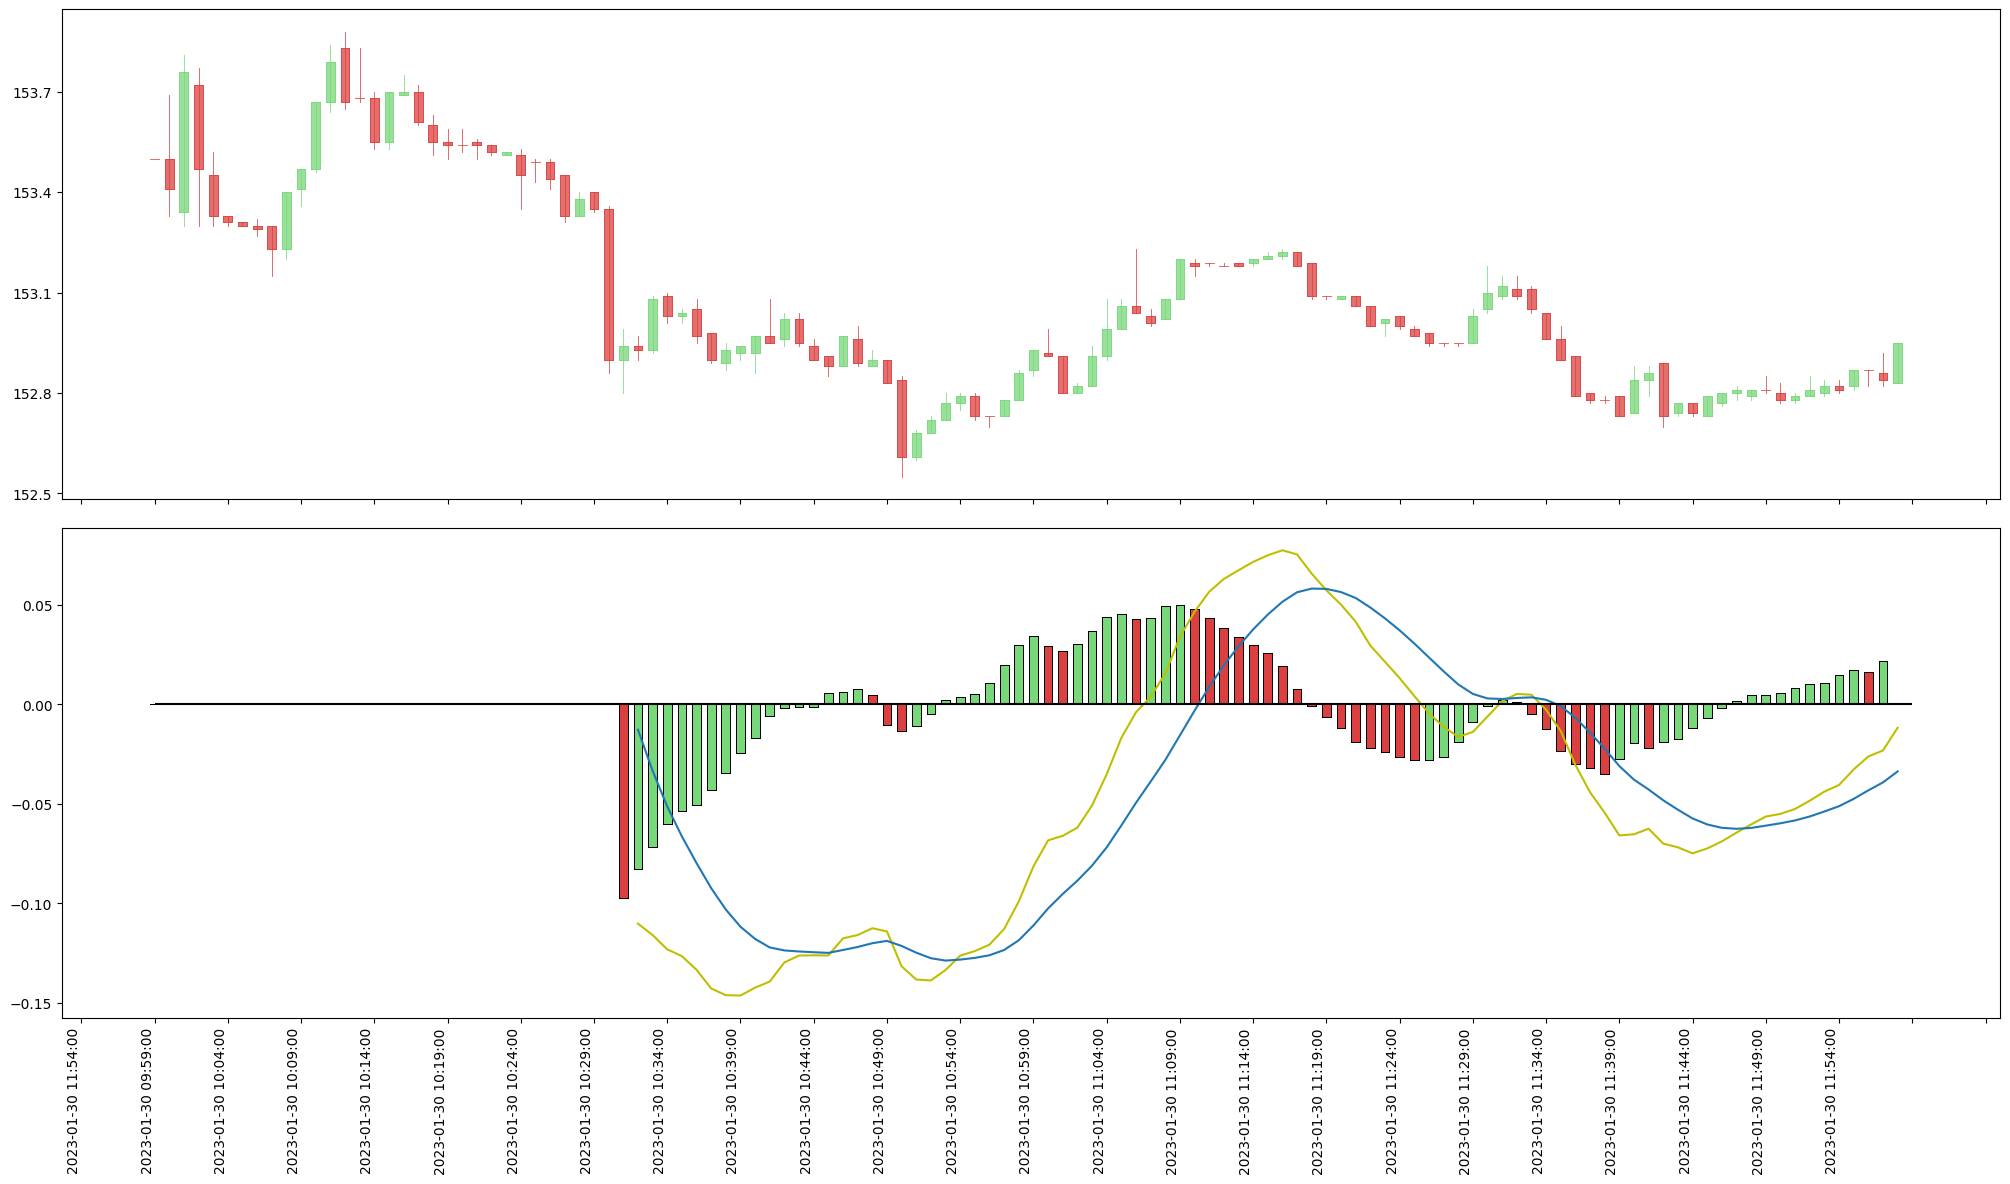

In [5]:
view.init_plot(2)
view.plot_candles()
view.plot_MACD()

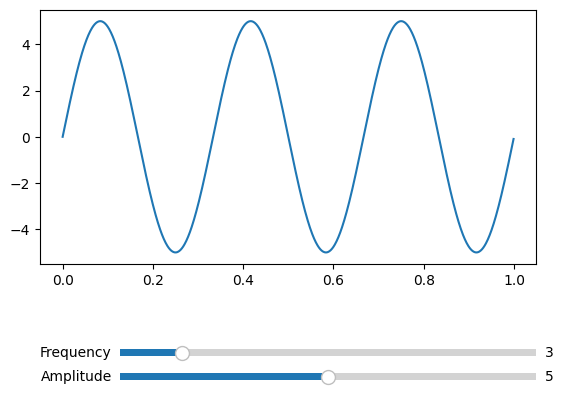

In [6]:

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
 
# Create subplot
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.35)
 
# Create and plot sine wave
t = np.arange(0.0, 1.0, 0.001)
s = 5 * np.sin(2 * np.pi * 3 * t)
l, = plt.plot(t, s)
 
# Create axes for frequency and amplitude sliders
axfreq = plt.axes([0.25, 0.15, 0.65, 0.03])
axamplitude = plt.axes([0.25, 0.1, 0.65, 0.03])
 
# Create a slider from 0.0 to 20.0 in axes axfreq
# with 3 as initial value
freq = Slider(axfreq, 'Frequency', 0.0, 20.0, 3)
 
# Create a slider from 0.0 to 10.0 in axes axfreq
# with 5 as initial value and valsteps of 1.0
amplitude = Slider(axamplitude, 'Amplitude', 0.0,
                   10.0, 5, valstep=1.0)
 
# Create function to be called when slider value is changed
 
def update(val):
    f = freq.val
    a = amplitude.val
    l.set_ydata(a*np.sin(2*np.pi*f*t))
 
# Call update function when slider value is changed
freq.on_changed(update)
amplitude.on_changed(update)
 
# display graph
plt.show()

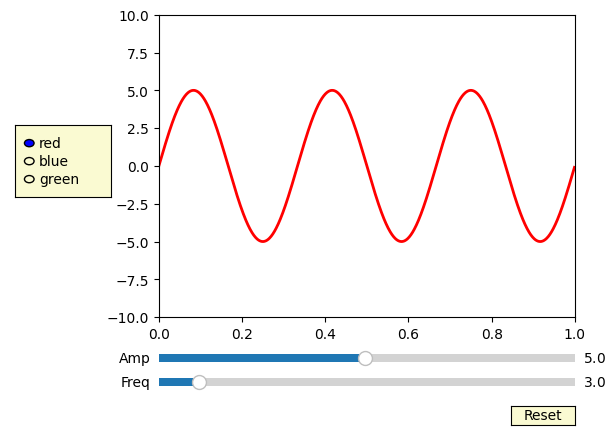

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t, s, lw=2, color='red')
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()
sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()

In [13]:
import ipywidgets as widgets # pip install ipywidgetsjupyter nbextension enable widgetsnbextension
from IPython.display import display

In [15]:
# widgets.IntSlider(
#     min=0,
#     max=10,
#     step=1,
#     description='Slider:',
#     value=3
# )

slider = widgets.IntSlider()
display(slider)

IntSlider(value=0)

In [19]:
print(slider.value)

72
